In [1]:
1+1

2

In [2]:
a = 5

In [3]:
b = 2.3
course = 'DLMIA'
year = 2023
letter = 'g'

In [4]:
c = a + b

In [5]:
c

7.3

In [6]:
type(b)

float

In [7]:
float(year)

2023.0

In [8]:
float(letter)

ValueError: could not convert string to float: 'g'

In [9]:
B

NameError: name 'B' is not defined

In [10]:
def greet():
    return 'Hello world'

In [11]:
greet()

'Hello world'

In [12]:
def add_numbers(a, b):
    return a + b

In [13]:
def multiply_numbers(a, b):
    return a * b

def my_function(a, b, c):
    d = add_numbers(a, b)
    return multiply_numbers(d, c)

my_function(2, 5, 6)

42

In [14]:
def factorial(a):
    if a > 0:
        return a * factorial(a - 1)
    else:
        return 1
    
factorial(5)

120

In [15]:
def manipulate():
    u = 8

u

NameError: name 'u' is not defined

In [16]:
e = 4

def change_e(f):
    e = f

change_e(6)
e

4

In [17]:
class Car:

    def __init__(self, color, brand, speed=0): 
        self.color = color
        self.brand = brand
        self.speed = speed
    
    def __call__(self):
        print(f'Toot toot, I am the fastest {self.brand}')        
        
    def accelerate(self):
        self.speed += 1
        
    def slow_down(self):
        self.speed = max(self.speed - 1, 0)      

In [18]:
jelmers_car = Car(color='gray', brand='skoda')
print(jelmers_car.speed)

0


In [19]:
jelmers_car.accelerate()
print(jelmers_car.speed)
jelmers_car.slow_down()
jelmers_car.slow_down()
print(jelmers_car.speed)

# To call the __call__ function, we just pretend the object is a function
jelmers_car()

1
0
Toot toot, I am the fastest skoda


In [20]:
dieuwertjes_car = Car(color='gold', brand='hyundai', speed=100)

In [21]:
def racing_time(car_a, car_b):
    if car_a.speed > car_b.speed:
        print('The first car wins!')
    elif car_b.speed > car_a.speed:
        print('The second car wins!')
    else:
        print('Everyone is a winner')
        
racing_time(jelmers_car, dieuwertjes_car)      

The second car wins!


In [22]:
class FiatCar(Car):
       
    def __init__(self, year):
        Car.__init__(self, color='red', brand='fiat')        
        self.year = year    

In [23]:
my_fiat = FiatCar(1922)
print(my_fiat.color)
print(my_fiat.brand)
my_fiat.accelerate()
print(my_fiat.speed)
print(my_fiat.year)

red
fiat
1
1922


In [24]:
a_tuple = (12, 4, 8)
a_list = [12, 4, 8]
a_set = {12, 4, 8}

In [25]:
a_list += [3, 4, 5]
print(a_list)

a_set |= {3, 4, 5}
print(a_set)

[12, 4, 8, 3, 4, 5]
{3, 4, 5, 8, 12}


In [26]:
print(a_list[4])
print(a_tuple[1])
print(a_set[2])

4
4


TypeError: 'set' object is not subscriptable

In [27]:
a_list = [1, 2, 3, 1, 2, 3]
a_tuple = (1, 2, 3, 1, 2,3)
a_set = {1, 2, 3, 1, 2, 3}

print(a_list)
print(a_tuple)
print(a_set)

[1, 2, 3, 1, 2, 3]
(1, 2, 3, 1, 2, 3)
{1, 2, 3}


In [28]:
print(3 in a_list)

True


In [29]:
a_dict = {'a': 2, 'b': 4, 'c': 8}
a_dict['b']

4

In [30]:
cars = {'Jelmer': jelmers_car, 'Dieuwertje': dieuwertjes_car}
racing_time(cars['Jelmer'], cars['Dieuwertje'])

The second car wins!


In [31]:
mixed_dict = {'Jelmer': jelmers_car, 'a': 4, 2: 'b'}
mixed_dict[2]

'b'

In [32]:
data_path = r'/Users/jmwolterink/Downloads/Tutorial_1'

In [33]:
from google.colab import drive

drive.mount('/content/drive')
data_path = r'/content/drive/My Drive/WHEREDIDYOUPUTTHEDATA?'

ModuleNotFoundError: No module named 'google.colab'

In [34]:
# !pip install SimpleITK
# !pip install matplotlib

In [35]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os

In [36]:
image_file = os.path.join(data_path, r'TEV1P1CTI.mhd')  

with open(image_file) as f:
    for line in f:
        print(line.strip())

ObjectType = Image
NDims = 3
BinaryData = True
BinaryDataByteOrderMSB = False
CompressedData = True
CompressedDataSize = 16868163
TransformMatrix = 1 0 0 0 1 0 0 0 1
Offset = 0 0 0
CenterOfRotation = 0 0 0
AnatomicalOrientation = RAI
ElementSpacing = 0.48828100000000002 0.48828100000000002 2.5
ITK_InputFilterName = MetaImageIO
DimSize = 512 512 64
ElementType = MET_SHORT
ElementDataFile = TEV1P1CTI.zraw


In [37]:
image = sitk.ReadImage(image_file)

In [38]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())

(512, 512, 64)
(0.0, 0.0, 0.0)
(0.488281, 0.488281, 2.5)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [39]:
print(image.GetPixel(100, 100, 10))

-49


In [40]:
image.SetPixel(100, 100, 10, 0)

In [41]:
image_array = sitk.GetArrayFromImage(image)

In [42]:
print(image_array.shape)

(64, 512, 512)


In [43]:
image_array = np.swapaxes(image_array, 0, 2)

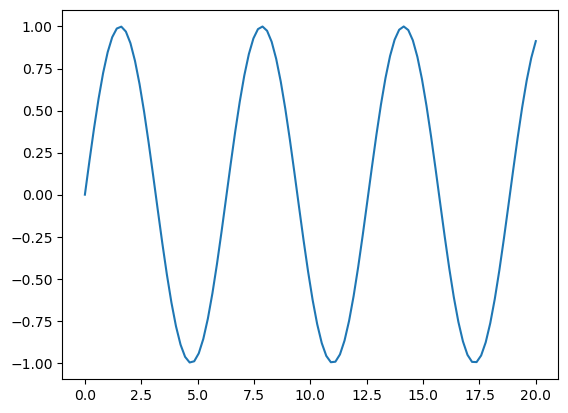

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()
x = np.linspace(0, 20, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

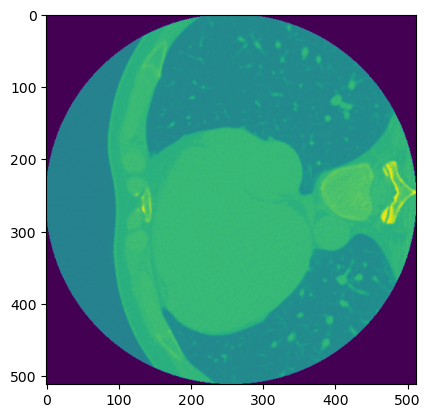

In [45]:
plt.figure()
plt.imshow(image_array[:, :, 20])
plt.show()

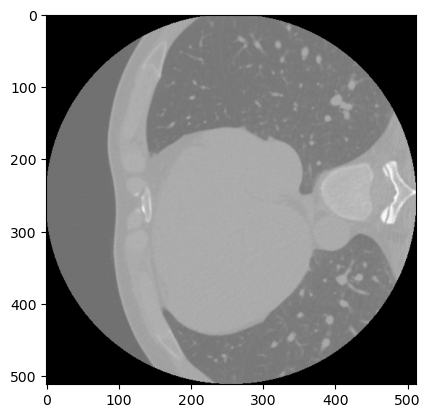

In [46]:
plt.figure()
plt.imshow(image_array[:, :, 20], cmap = 'gray')
plt.show()

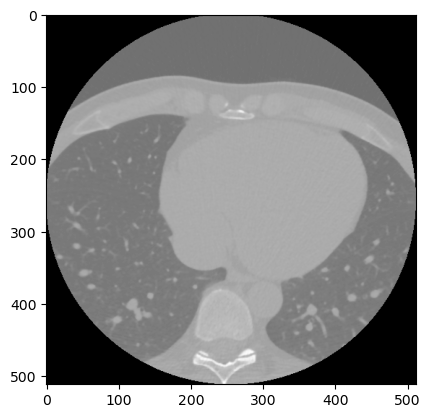

In [47]:
plt.figure()
plt.imshow(image_array[:, :, 20].transpose(), cmap='gray')
plt.show()

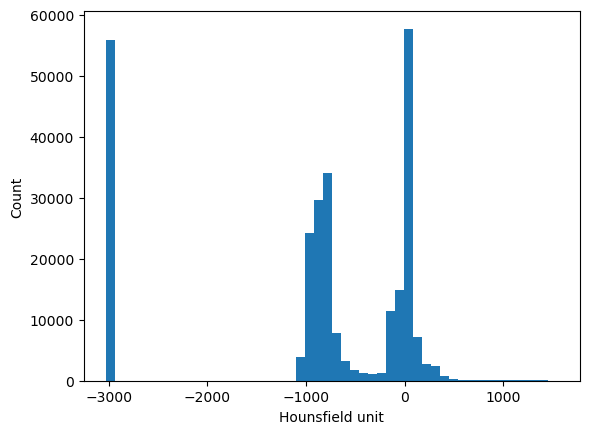

In [48]:
plt.figure()
plt.hist(image_array[:, :, 20].flatten(), bins=50)
plt.xlabel('Hounsfield unit')
plt.ylabel('Count')
plt.show()

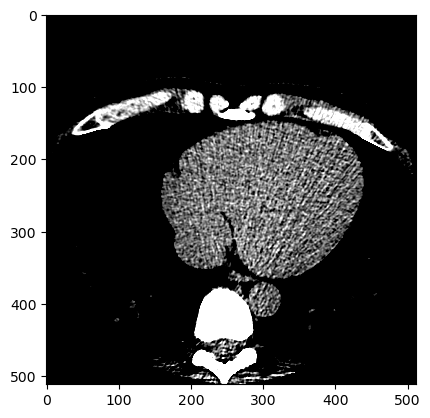

In [49]:
plt.figure()
plt.imshow(image_array[:, :, 20].transpose(), cmap='gray', vmin=0, vmax=100)
plt.show()